In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [31]:
#creating a function to detect faces

def face_detector(imgpath):
    #.caffemodel file which contains the weights for the actual layers
    modelFile = "/content/res10_300x300_ssd_iter_140000.caffemodel"
    #.prxototxt files defines the model architecture (i.e., the layers themselves)
    configFile = "/content/deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()
    #[,frame,number of detection,[classid,class score,conf,x,y,h,w]]
    # loop over the detections
    x=0
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            x=x+1
            box = detections[0, 0, i, 3:] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
    if x==0:
        print("Photo is rejected as no face was detected")  
    elif x>1:
        print('Photo is rejected as multiple faces were detected')
    else:
        print("Image accepted")

       
    # show the output image
    plt.imshow( frame)
    plt.show()
    print('Faces found: {}'.format(x))

Image accepted


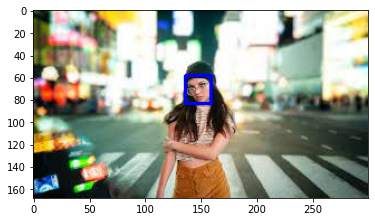

Faces found: 1


In [32]:
face_detector('/content/download.jpg') 

Photo is rejected as multiple faces were detected


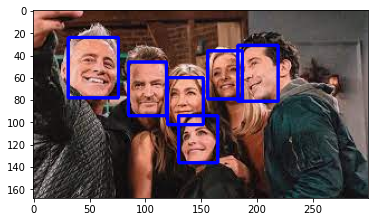

Faces found: 6


In [33]:
face_detector('/content/multiple faces.jpg')

Photo is rejected as no face was detected


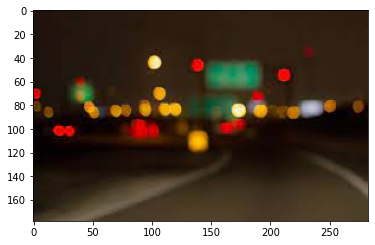

Faces found: 0


In [34]:
face_detector('/content/download (2).jpg')

Image accepted


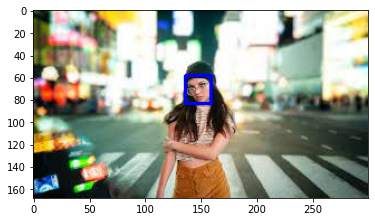

Faces found: 1


In [35]:
face_detector('/content/background blur.jpg')